In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [30]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
data.columns = ['label', 'message']

In [36]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
data["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [42]:
data.isna().sum()

label      0
message    0
dtype: int64

In [46]:
data['length'] = data['message'].apply(len)

avg_lengths = data.groupby('label')['length'].mean()
print(avg_lengths)

label
ham      71.023627
spam    138.866131
Name: length, dtype: float64


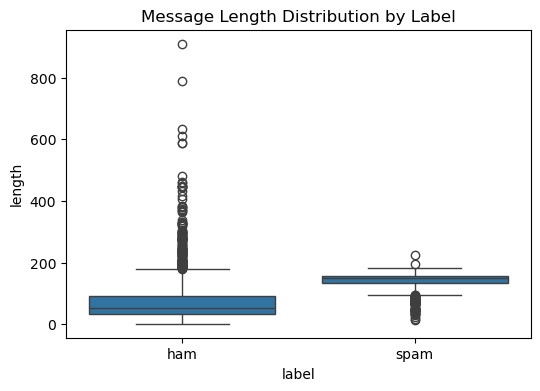

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='length', data=data)
plt.title('Message Length Distribution by Label')
plt.show()

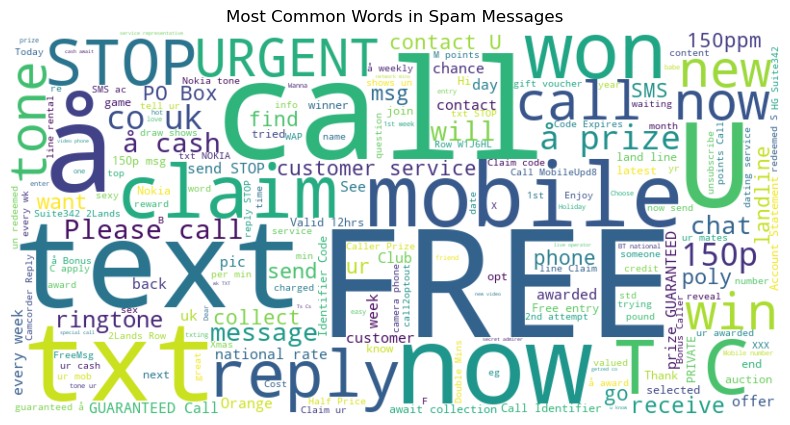

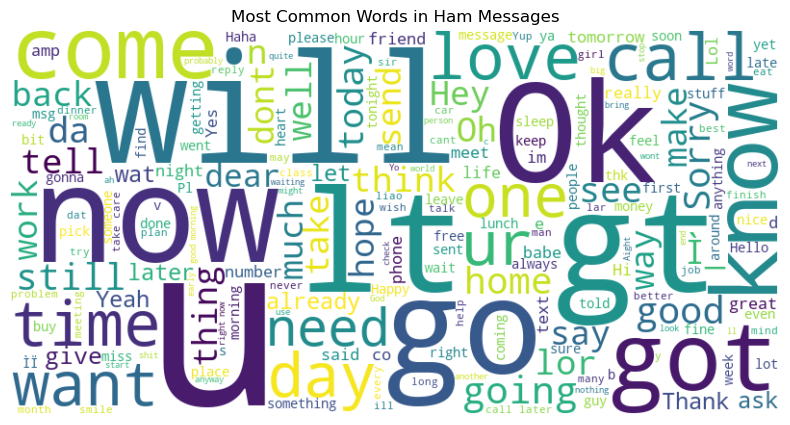

In [57]:
from wordcloud import WordCloud

spam_text = " ".join(data[data['label'] == 'spam']['message'])
ham_text = " ".join(data[data['label'] == 'ham']['message'])

plt.figure(figsize=(10,5))
wc_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')
plt.show()

plt.figure(figsize=(10,5))
wc_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Messages')
plt.show()


In [69]:
import nltk
import re
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [71]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = text.strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(words)


In [73]:
data['clean_message'] = data['message'].apply(preprocess_text)
data[['message', 'clean_message']].head(10)

,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back id like fun...
6,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,Had your mobile 11 months or more? U R entitle...,mobile month u r entitled update latest colour...


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
X = data['clean_message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
tfidf = TfidfVectorizer(max_features=3000)  
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [81]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [83]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[965   1]
 [ 32 117]]


In [85]:
import joblib
joblib.dump(model, 'spam_detector_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']